In [ ]:
import numpy as np
import matplotlib.pyplot as plt

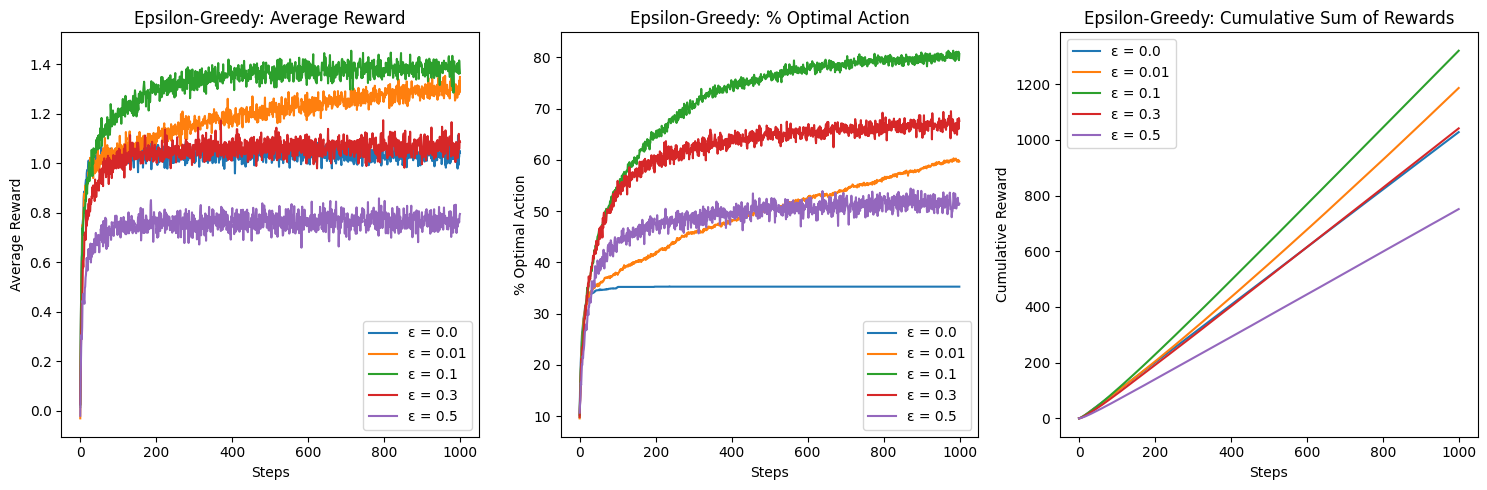

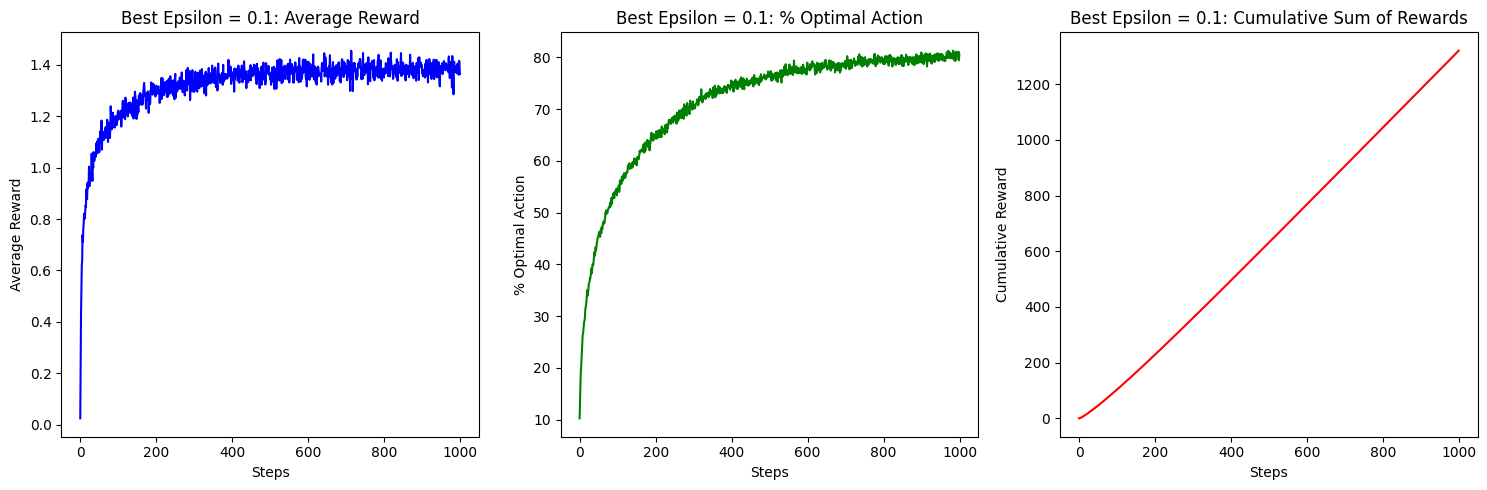

In [ ]:
class MultiArmedBandit:
    def __init__(self, k=10, steps=1000, runs=2000):
        self.k = k
        self.steps = steps
        self.runs = runs

    def run(self, epsilon):
        rewards = np.zeros((self.runs, self.steps))
        optimal_actions = np.zeros((self.runs, self.steps))

        for run in range(self.runs):
            q_true = np.random.normal(0, 1, self.k)
            optimal_action = np.argmax(q_true)

            q_estimates = np.zeros(self.k)
            action_counts = np.zeros(self.k)

            for step in range(self.steps):
                if np.random.rand() < epsilon:
                    action = np.random.choice(self.k)  # Explore
                else:
                    action = np.argmax(q_estimates)  # Exploit

                reward = np.random.normal(q_true[action], 1)
                action_counts[action] += 1
                q_estimates[action] += (reward - q_estimates[action]) / action_counts[action]

                rewards[run, step] = reward
                optimal_actions[run, step] = 1 if action == optimal_action else 0

        avg_rewards = rewards.mean(axis=0)
        avg_optimal_actions = optimal_actions.mean(axis=0)
        cumulative_rewards = np.cumsum(avg_rewards)

        return avg_rewards, avg_optimal_actions, cumulative_rewards

    def plot_results(self, results, epsilons):
        plt.figure(figsize=(15, 5))

        plt.subplot(1, 3, 1)
        for epsilon, (avg_rewards, _, _) in results.items():
            plt.plot(avg_rewards, label=f"ε = {epsilon}")
        plt.xlabel("Steps")
        plt.ylabel("Average Reward")
        plt.title("Epsilon-Greedy: Average Reward")
        plt.legend()

        plt.subplot(1, 3, 2)
        for epsilon, (_, avg_optimal_actions, _) in results.items():
            plt.plot(avg_optimal_actions * 100, label=f"ε = {epsilon}")
        plt.xlabel("Steps")
        plt.ylabel("% Optimal Action")
        plt.title("Epsilon-Greedy: % Optimal Action")
        plt.legend()

        plt.subplot(1, 3, 3)
        for epsilon, (_, _, cumulative_rewards) in results.items():
            plt.plot(cumulative_rewards, label=f"ε = {epsilon}")
        plt.xlabel("Steps")
        plt.ylabel("Cumulative Reward")
        plt.title("Epsilon-Greedy: Cumulative Sum of Rewards")
        plt.legend()

        plt.tight_layout()
        plt.show()

    def plot_best_epsilon(self, results, best_epsilon):
        avg_rewards, avg_optimal_actions, cumulative_rewards = results[best_epsilon]

        plt.figure(figsize=(15, 5))

        plt.subplot(1, 3, 1)
        plt.plot(avg_rewards, color="b")
        plt.xlabel("Steps")
        plt.ylabel("Average Reward")
        plt.title(f"Best Epsilon = {best_epsilon}: Average Reward")

        plt.subplot(1, 3, 2)
        plt.plot(avg_optimal_actions * 100, color="g")
        plt.xlabel("Steps")
        plt.ylabel("% Optimal Action")
        plt.title(f"Best Epsilon = {best_epsilon}: % Optimal Action")

        plt.subplot(1, 3, 3)
        plt.plot(cumulative_rewards, color="r")
        plt.xlabel("Steps")
        plt.ylabel("Cumulative Reward")
        plt.title(f"Best Epsilon = {best_epsilon}: Cumulative Sum of Rewards")

        plt.tight_layout()
        plt.show()


bandit = MultiArmedBandit()
epsilons = [0.0, 0.01, 0.1, 0.3, 0.5]
results = {epsilon: bandit.run(epsilon) for epsilon in epsilons}

best_epsilon = max(results, key=lambda eps: results[eps][2][-1])

bandit.plot_results(results, epsilons)

bandit.plot_best_epsilon(results, best_epsilon)


#CONCLUSION

The results from the epsilon-greedy multi-armed bandit simulation clearly illustrate the impact of different exploration rates on learning efficiency. The first row of plots compares multiple epsilon values across average reward, percentage of optimal actions chosen, and cumulative rewards. Epsilon = 0.1 emerges as the best-performing value, achieving the highest average reward and optimal action selection over time. This confirms that a balance between exploration and exploitation leads to better long-term performance. The second row isolates epsilon = 0.1, further highlighting its effectiveness in consistently selecting the optimal action and maximizing cumulative rewards. Higher epsilon values (e.g., 0.3, 0.5) introduce excessive exploration, reducing immediate gains, while lower values (e.g., 0.0, 0.01) fail to explore sufficiently, leading to suboptimal learning. The findings suggest that moderate exploration (ε ≈ 0.1) provides an optimal trade-off, maximizing learning efficiency in stochastic environments.